In [1]:
# Analysis and Visualization of Grid Search Results
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp
from pathlib import Path
from matplotlib import cm
# Parse units for easier plotting
import ast

In [2]:
def round_expr(expr: sp.Expr, digits: int = 5) -> sp.Expr:
    nums = {n: round(float(n), digits) for n in expr.atoms(sp.Number)}
    return expr.xreplace(nums)

def plot_training_curves(units, num_layers=1):
    if num_layers == 1:
        fname = f'grid_search_l1_u{units}_history.csv'
    else:
        fname = f'grid_search_l2_u{"-".join(map(str, units))}_history.csv'
    fpath = hist_dir / fname
    if not fpath.exists():
        print(f'History file not found: {fpath}')
        return
    hist = pd.read_csv(fpath)
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    ax[0].plot(hist['epoch'], hist['train_mse'], label='MSE')
    ax[0].plot(hist['epoch'], hist['train_loss'], label='Loss', alpha=0.5)
    ax[0].set_title(f'Training Loss/MSE: {num_layers}x{units}')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss/MSE')
    ax[0].legend()
    ax[1].plot(hist['epoch'], hist['train_rel_err'], label='Rel. Error', color='orange')
    ax[1].set_title('Relative Error')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Rel. Error')
    ax[1].legend()
    plt.tight_layout()
    plt.show()


In [ ]:
outputs_dir = Path("../outputs")

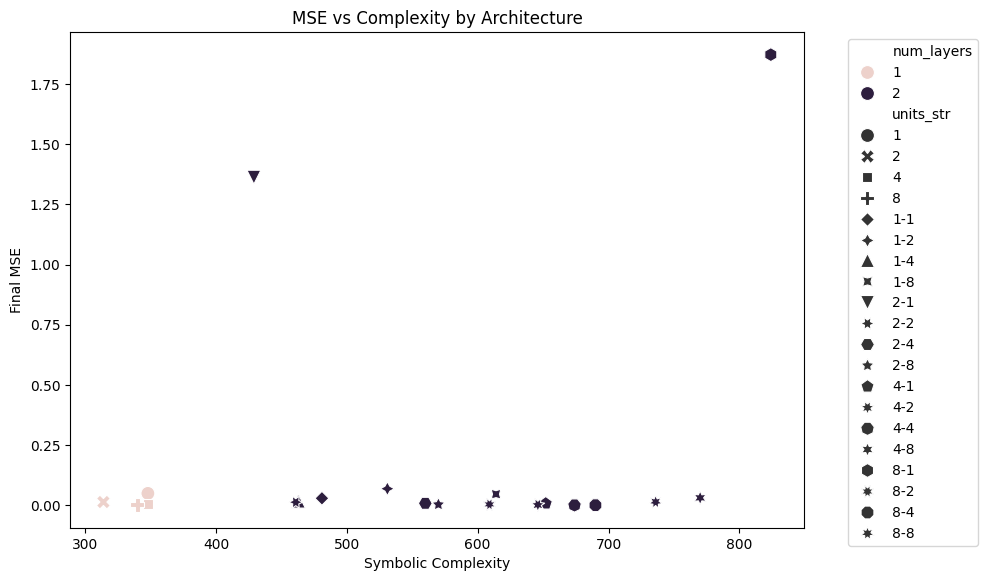

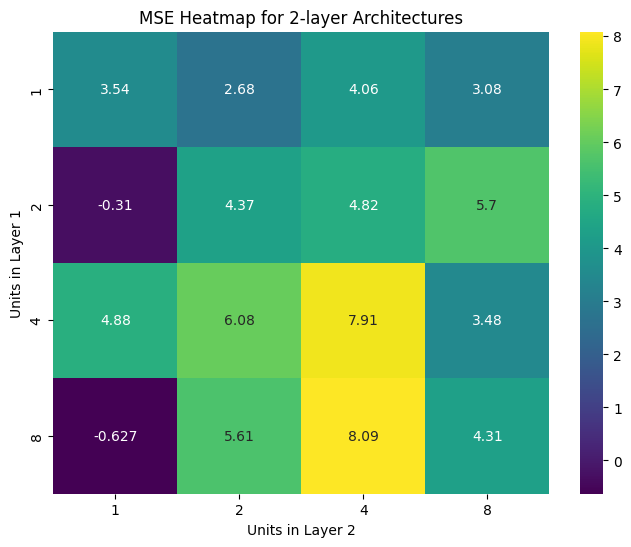

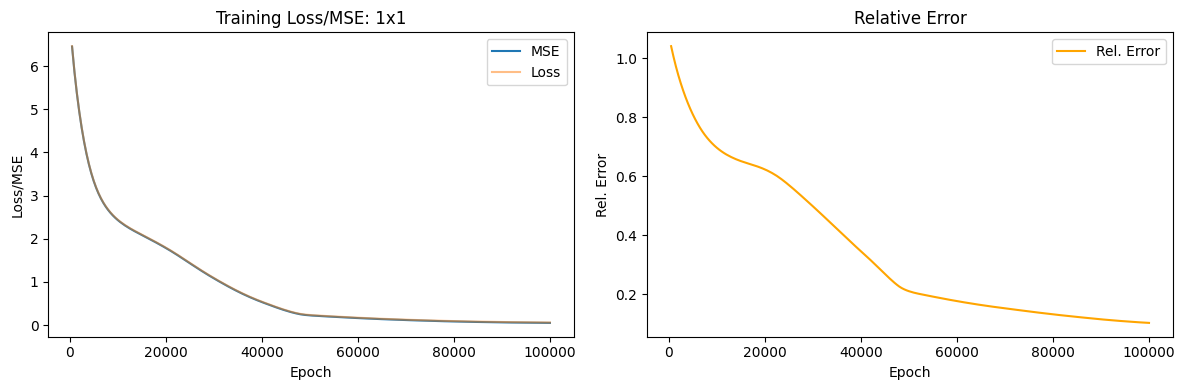

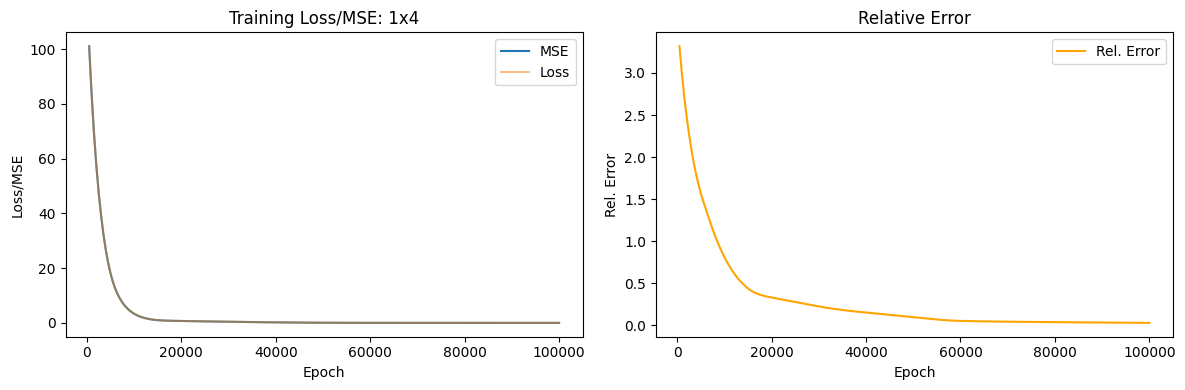

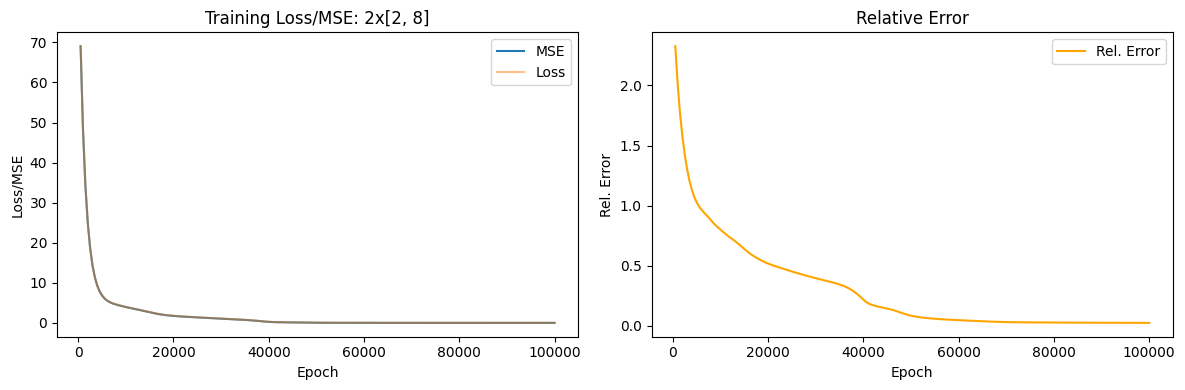

--- Rounding to 1 digits ---
expr0: 0.1*x_1**3.0/x_0**3.0 + 0.1*x_1**2.0/x_0**2.0 + 0.2*x_1/x_0**1.0 + 0.8
expr1: 0.1*x_1**3.0/x_0**3.0 + 0.2*x_1**2.0/x_0**2.0 + 0.4*x_1/x_0**1.0 + 0.1*x_1**2.0 + 1.0
expr2: 0.1*x_1**4.0/x_0**4.0 + 0.2*x_1**3.0/x_0**3.0 + 0.4*x_1**2.0/x_0**2.0 + 0.5*x_1/x_0**1.0 - 0.1*x_0/x_1**1.0 + 0.1*x_0*x_1 + 0.1*x_1 + 0.1*x_1**2.0 + 1.7

--- Rounding to 2 digits ---
expr0: 0.01*x_1**5.0/x_0**5.0 + 0.02*x_1**4.0/x_0**4.0 + 0.07*x_1**3.0/x_0**3.0 + 0.14*x_1**2.0/x_0**2.0 + 0.01*x_1**4.0/x_0**2.0 + 0.19*x_1/x_0**1.0 + 0.01*x_1**2.0/x_0**1.0 + 0.02*x_1**3.0/x_0**1.0 - 0.03*x_0/x_1**1.0 + 0.03*x_0*x_1 + 0.01*x_0 - 0.01*x_0**2.0/x_1**2.0 + 0.01*x_0**2.0 + 0.02*x_1 + 0.04*x_1**2.0 + 0.77
expr1: 0.01*x_1**5.0/x_0**5.0 + 0.04*x_1**4.0/x_0**4.0 + 0.11*x_1**3.0/x_0**3.0 + 0.25*x_1**2.0/x_0**2.0 + 0.01*x_1**4.0/x_0**2.0 + 0.36*x_1/x_0**1.0 + 0.01*x_1**2.0/x_0**1.0 + 0.02*x_1**3.0/x_0**1.0 - 0.03*x_0/x_1**1.0 + 0.04*x_0*x_1 + 0.01*x_0 - 0.01*x_0**2.0/x_1**2.0 + 0.03*x_1 + 0.06*

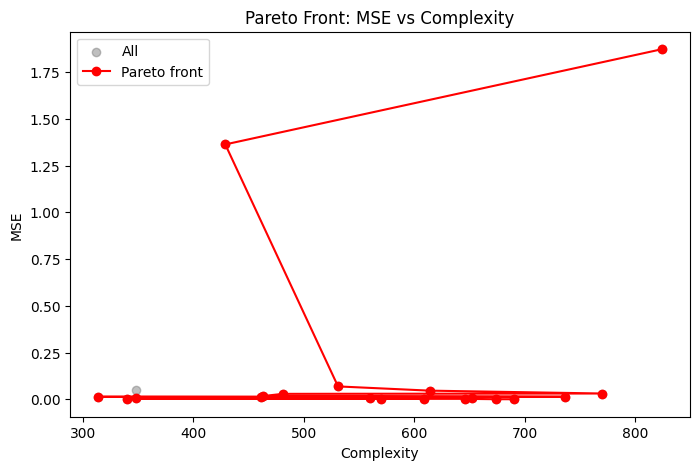

,num_layers,units,mse,complexity,expr0,expr1,expr2
18,2,"[8, 4]",0.000307,690,2.0e-5*x_1**8.0/x_0**8.0 + 0.00024*x_1**7.0/x_...,4.0e-5*x_1**8.0/x_0**8.0 + 0.00037*x_1**7.0/x_...,6.0e-5*x_1**8.0/x_0**8.0 + 0.00061*x_1**7.0/x_...
14,2,"[4, 4]",0.000369,674,2.0e-5*x_1**8.0/x_0**8.0 + 0.00033*x_1**7.0/x_...,2.0e-5*x_1**8.0/x_0**8.0 + 0.00024*x_1**7.0/x_...,4.0e-5*x_1**8.0/x_0**8.0 + 0.00057*x_1**7.0/x_...
13,2,"[4, 2]",0.002297,646,5.0e-5*x_1**8.0/x_0**8.0 + 0.00067*x_1**7.0/x_...,8.0e-5*x_1**8.0/x_0**8.0 + 0.00111*x_1**7.0/x_...,0.00012*x_1**8.0/x_0**8.0 + 0.00178*x_1**7.0/x...
3,1,[8],0.002572,340,0.00031*x_1**4.0/x_0**4.0 + 0.00222*x_1**3.0/x...,0.00146*x_1**4.0/x_0**4.0 + 0.01049*x_1**3.0/x...,0.00214*x_1**4.0/x_0**4.0 + 0.01533*x_1**3.0/x...
11,2,"[2, 8]",0.003340,570,-3.0e-5*x_1**6.0/x_0**6.0 - 0.00018*x_1**5.0/x...,-3.0e-5*x_1**6.0/x_0**6.0 - 0.00015*x_1**5.0/x...,-6.0e-5*x_1**6.0/x_0**6.0 - 0.00033*x_1**5.0/x...


In [4]:
# --- Load summary ---
sum_path =outputs_dir/"grid_search_summary.csv"
df = pd.read_csv(sum_path)


df['units_tuple'] = df['units'].apply(lambda x: tuple(ast.literal_eval(x)))
df['units_str'] = df['units'].apply(lambda x: '-'.join(map(str, ast.literal_eval(x))))

# --- Visualize MSE and complexity by architecture ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='complexity', y='mse', hue='num_layers', style='units_str', s=100)
plt.title('MSE vs Complexity by Architecture')
plt.xlabel('Symbolic Complexity')
plt.ylabel('Final MSE')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- MSE matrix heatmap (for 2-layer models) ---
df2 = df[df['num_layers']==2].copy()
if not df2.empty:
    # Build matrix: rows=units[0], cols=units[1]
    df2['u0'] = df2['units_tuple'].apply(lambda x: x[0])
    df2['u1'] = df2['units_tuple'].apply(lambda x: x[1])
    mse_matrix = df2.pivot(index='u0', columns='u1', values='mse')
    plt.figure(figsize=(8,6))
    sns.heatmap(-np.log(mse_matrix), annot=True, fmt='.3g', cmap='viridis')
    plt.title('MSE Heatmap for 2-layer Architectures')
    plt.xlabel('Units in Layer 2')
    plt.ylabel('Units in Layer 1')
    plt.show()

# --- Plot training curves for selected models ---
hist_dir = outputs_dir

# Example: plot for a few models
plot_training_curves(1, num_layers=1)
plot_training_curves(4, num_layers=1)
plot_training_curves([2,8], num_layers=2)

# --- Symbolic expressions: rounding to different digits ---
# Try for the best model (lowest MSE)
best_row = df.loc[df['mse'].idxmin()]
for d in [1, 2, 4, 6]:
    print(f'--- Rounding to {d} digits ---')
    for k in ['expr0','expr1','expr2']:
        try:
            expr = sp.sympify(best_row[k])
            rounded = round_expr(expr, d)
            print(f'{k}:', rounded)
        except Exception as e:
            print(f'{k}: (error) {e}')
    print()

# --- Other analysis: Pareto front (MSE vs complexity) ---
pareto = df.sort_values(['mse','complexity']).drop_duplicates('complexity')
plt.figure(figsize=(8,5))
plt.scatter(df['complexity'], df['mse'], c='gray', alpha=0.5, label='All')
plt.plot(pareto['complexity'], pareto['mse'], 'r-o', label='Pareto front')
plt.xlabel('Complexity')
plt.ylabel('MSE')
plt.title('Pareto Front: MSE vs Complexity')
plt.legend()
plt.show()

# --- Show best models ---
display_cols = ['num_layers','units','mse','complexity','expr0','expr1','expr2']
df_best = df.nsmallest(5, 'mse')[display_cols]
display(df_best)

# --- You can add more analysis below as needed ---
# E.g., compare expressions, plot error vs units, etc.

# Additional Plots and Data Processing
This section provides further visualizations and processes the symbolic expressions in the DataFrame for rounding and complexity analysis.

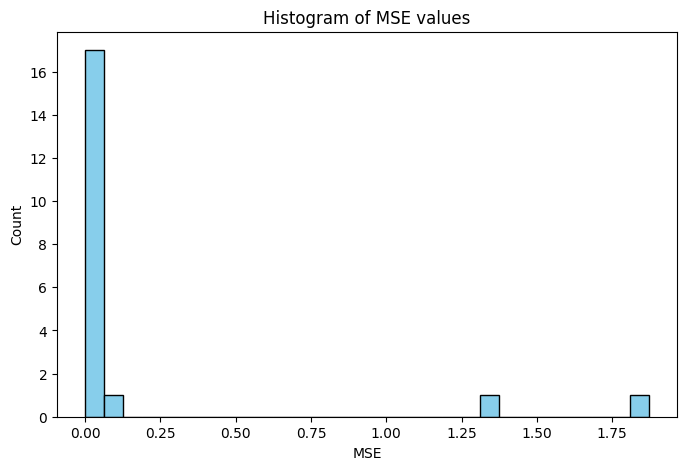

In [5]:
# Histogram of MSE values
plt.figure(figsize=(8,5))
plt.hist(df['mse'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of MSE values')
plt.xlabel('MSE')
plt.ylabel('Count')
plt.show()

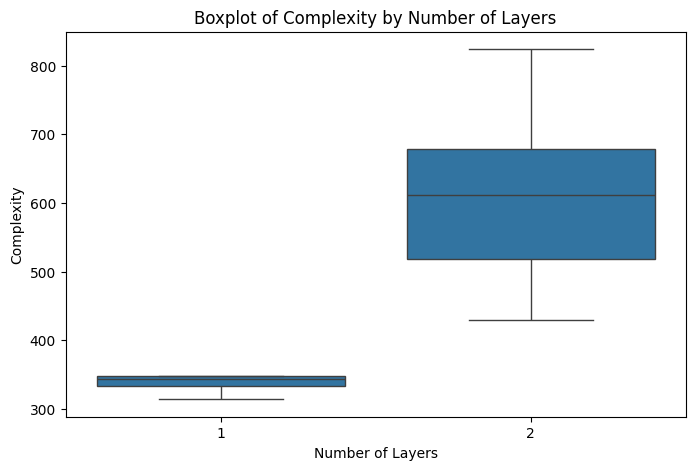

In [6]:
# Boxplot of complexity grouped by number of layers
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='num_layers', y='complexity')
plt.title('Boxplot of Complexity by Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Complexity')
plt.show()

In [7]:
# Rounding symbolic expressions in DataFrame and storing in new columns
for d in [1, 2, 4, 6]:
    for k in ['expr0', 'expr1', 'expr2']:
        colname = f'{k}_round{d}'
        df[colname] = df[k].apply(lambda x: str(round_expr(sp.sympify(x), d)))

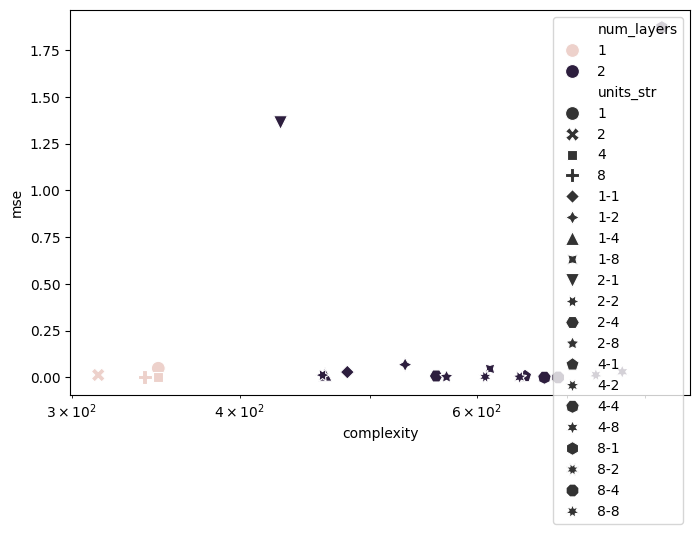

In [8]:
#plot complexity round 2 vs log MSE
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='complexity', y='mse', hue='num_layers', style='units_str', s=100)
plt.xscale('log')

In [9]:
# Recalculate complexity as number of operations in each rounded formula, then sum for all expressions
for d in [1, 2, 4, 6]:
    total_comp_col = f'total_round{d}_complexity'
    comp_cols = []
    for k in ['expr0', 'expr1', 'expr2']:
        colname = f'{k}_round{d}'
        comp_col = f'{k}_round{d}_complexity'
        comp_cols.append(comp_col)
        def count_ops(expr_str):
            try:
                expr = sp.sympify(expr_str)
                return len([node for node in sp.preorder_traversal(expr) if (isinstance(node, sp.Function) or (isinstance(node, sp.Basic) and not node.is_Atom))])
            except Exception:
                return 0
        df[comp_col] = df[colname].apply(count_ops)
    df[total_comp_col] = df[comp_cols].sum(axis=1)

In [10]:
# Display a sample of the DataFrame with new columns
cols = ['num_layers', 'units', 'mse', 'complexity']
for d in [1, 2, 4, 6]:
    for k in ['expr0', 'expr1', 'expr2']:
        cols.append(f'{k}_round{d}')
        cols.append(f'{k}_round{d}_complexity')
display(df[cols].head())

,num_layers,units,mse,complexity,expr0_round1,expr0_round1_complexity,expr1_round1,expr1_round1_complexity,expr2_round1,expr2_round1_complexity,...,expr1_round4,expr1_round4_complexity,expr2_round4,expr2_round4_complexity,expr0_round6,expr0_round6_complexity,expr1_round6,expr1_round6_complexity,expr2_round6,expr2_round6_complexity
0,1,[1],0.049406,348,0.1*x_1**2.0/x_0**2.0 + 1.6,4,0.2*x_1**2.0/x_0**2.0 + 0.1*x_1/x_0**1.0 - 0.1...,11,0.3*x_1**2.0/x_0**2.0 + 0.1*x_1/x_0**1.0 - 0.1...,13,...,0.0043*x_1**4.0/x_0**4.0 + 0.0036*x_1**3.0/x_0...,61,0.0067*x_1**4.0/x_0**4.0 + 0.0057*x_1**3.0/x_0...,63,0.0028*x_1**4.0/x_0**4.0 + 0.00237*x_1**3.0/x_...,69,0.00425*x_1**4.0/x_0**4.0 + 0.00359*x_1**3.0/x...,69,0.00675*x_1**4.0/x_0**4.0 + 0.00571*x_1**3.0/x...,69
1,1,[2],0.013442,314,0.1*x_1**3.0/x_0**3.0 + 0.1*x_1**2.0/x_0**2.0 ...,8,0.2*x_1**3.0/x_0**3.0 + 0.2*x_1**2.0/x_0**2.0 ...,8,0.1*x_1**4.0/x_0**4.0 + 0.3*x_1**3.0/x_0**3.0 ...,17,...,0.0316*x_1**4.0/x_0**4.0 + 0.1744*x_1**3.0/x_0...,56,0.0507*x_1**4.0/x_0**4.0 + 0.2798*x_1**3.0/x_0...,56,0.01871*x_1**4.0/x_0**4.0 + 0.10319*x_1**3.0/x...,56,0.03162*x_1**4.0/x_0**4.0 + 0.17444*x_1**3.0/x...,61,0.05072*x_1**4.0/x_0**4.0 + 0.2798*x_1**3.0/x_...,69
2,1,[4],0.004615,348,0.1*x_1**2.0 + 0.9,3,0.1*x_1**2.0 + 0.9,3,0.1*x_1 + 0.2*x_1**2.0 + 1.6,4,...,-0.0006*x_1**4.0/x_0**4.0 - 0.0033*x_1**3.0/x_...,66,-0.001*x_1**4.0/x_0**4.0 - 0.0055*x_1**3.0/x_0...,69,-0.00062*x_1**4.0/x_0**4.0 - 0.00328*x_1**3.0/...,69,-0.00063*x_1**4.0/x_0**4.0 - 0.00332*x_1**3.0/...,69,-0.00104*x_1**4.0/x_0**4.0 - 0.00549*x_1**3.0/...,69
3,1,[8],0.002572,340,-0.1*x_1/x_0**1.0 + 0.1*x_1**2.0 + 1.0,5,0.1*x_0*x_1 + 0.1*x_1**2.0 + 1.2,4,-0.1*x_1/x_0**1.0 + 0.1*x_0*x_1 + 0.1*x_1 + 0....,7,...,0.0015*x_1**4.0/x_0**4.0 + 0.0105*x_1**3.0/x_0...,64,0.0021*x_1**4.0/x_0**4.0 + 0.0153*x_1**3.0/x_0...,66,0.00031*x_1**4.0/x_0**4.0 + 0.00222*x_1**3.0/x...,64,0.00146*x_1**4.0/x_0**4.0 + 0.01049*x_1**3.0/x...,69,0.00214*x_1**4.0/x_0**4.0 + 0.01533*x_1**3.0/x...,69
4,2,"[1, 1]",0.028989,481,0.2*x_1**2.0/x_0**2.0 + 0.1*x_1/x_0**1.0 - 0.1...,11,0.3*x_1**2.0/x_0**2.0 + 0.2*x_1/x_0**1.0 - 0.2...,11,0.4*x_1**2.0/x_0**2.0 + 0.4*x_1/x_0**1.0 - 0.3...,11,...,0.0002*x_1**6.0/x_0**6.0 + 0.0006*x_1**5.0/x_0...,73,0.0003*x_1**6.0/x_0**6.0 + 0.001*x_1**5.0/x_0*...,86,0.00013*x_1**6.0/x_0**6.0 + 0.00038*x_1**5.0/x...,86,0.00021*x_1**6.0/x_0**6.0 + 0.00061*x_1**5.0/x...,99,0.00034*x_1**6.0/x_0**6.0 + 0.00102*x_1**5.0/x...,102


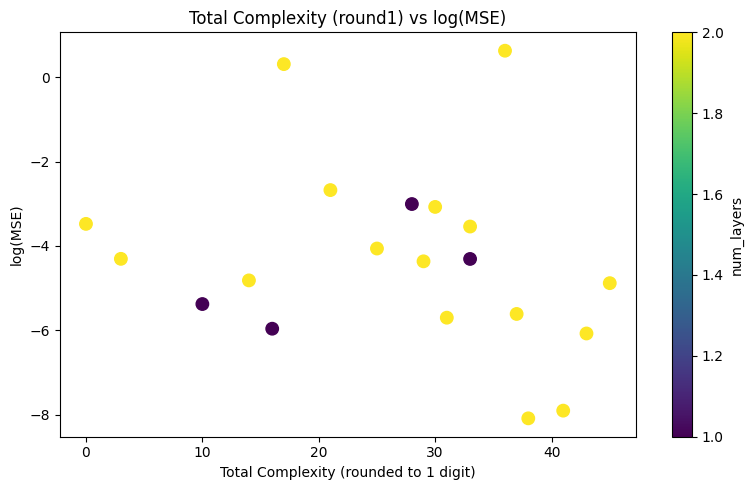

In [11]:
# Plot total complexity (round1) vs total log MSE
plt.figure(figsize=(8,5))
plt.scatter(df['total_round1_complexity'], np.log(df['mse']), c=df['num_layers'], cmap='viridis', s=80)
plt.xlabel('Total Complexity (rounded to 1 digit)')
plt.ylabel('log(MSE)')
plt.title('Total Complexity (round1) vs log(MSE)')
plt.colorbar(label='num_layers')
plt.tight_layout()
plt.show()